In [94]:
import skimage as sk
import numpy as np
from skimage import io, filters, measure, color
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import cv2
from numpy import ndim

# Read the image
def read_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img,cmap='gray')
    plt.show()
    img = img[:600,:]
    print('Image shape:', img.shape)
    plt.imshow(img,cmap='gray')
    plt.show()
    return img


#Thresholding
def thresholding(img):
    # Apply Otsu's thresholding
    ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print(f"Optimal threshold value: {ret}")
    plt.imshow(thresh, cmap='gray')
    plt.show()
    return thresh

# Remove the border
def remove_border(thresh):
    cleared = clear_border(thresh, )
    return cleared


# Label image regions
def label_image(cleared):
    labelled_image = label(cleared)
    print('Labelled Image:')
    plt.imshow(labelled_image,cmap='gray')
    plt.show()
    return labelled_image


# Find the number of particles 
def find_number_of_particles(label_image):
    regions = regionprops(label_image)
    print('Number of particles:', len(regions))
    return regions

#mark the particles on the original image
def mark_particles(img,regions):
    for region in regions:
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                             fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
    print('Marked Particles:')
    plt.imshow(img,cmap='gray')
    plt.show()

#Highlight the boundary of the particles on the original image
def highlight_boundary(img,regions):
    for region in regions:
        for point in region.coords:
            img[point[0],point[1]] = 255
    print('Highlighted Boundary:')
    plt.imshow(img,cmap='gray')
    plt.show()

# Find the area of the particles
def find_area(regions):
    print('Area of the particles:')
    n = 1
    for region in regions:
        print(f'Particle {n}: {region.area} pixels')
        n += 1

# Find the perimeter of the particles
def find_perimeter(regions):
    print('Perimeter of the particles:')
    n = 1
    for region in regions:
        print(f'Particle {n}: {region.perimeter} pixels')
        n += 1

# Find the eccentricity of the particles
def find_eccentricity(regions):
    print('Eccentricity of the particles:')
    n = 1
    for region in regions:
        print(f'Particle {n}: {region.eccentricity}')
        n += 1

# find the equivalent diameter of the particles
def find_equivalent_diameter(regions):
    print('Equivalent Diameter of the particles:')
    n = 1
    for region in regions:
        print(f'Particle {n}: {region.equivalent_diameter} pixels')
        n += 1
        

# plot size distribution
def plot_size_distribution(regions):
    areas = [region.area for region in regions]
    plt.hist(areas, bins=20, range=[0, 1000])
    plt.title('Size Distribution')
    plt.xlabel('Area')
    plt.ylabel('Number of Particles')
    plt.show()


# # Display the labeled image
# def display_labeled_image(label_image,img):
#     image_label_overlay = color.label2rgb(label_image, image=img, bg_label=0)

#     fig, ax = plt.subplots(figsize=(10, 6))
#     print('Labeled Image:')
#     ax.imshow(image_label_overlay)
#     plt.show()

# Main function
def execute(path):
    img = read_image(path)
    thresh = thresholding(img)
    cleared = remove_border(thresh)
    labelled_image = label_image(cleared)
    regions = find_number_of_particles(labelled_image)
    mark_particles(img,regions)
    highlight_boundary(img,regions)
    find_area(regions)
    find_perimeter(regions)
    find_eccentricity(regions)
    plot_size_distribution(regions)
    # display_labeled_image(label_image,img)



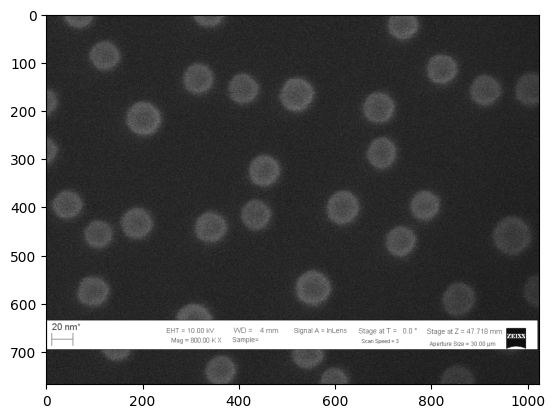

Image shape: (600, 1024)


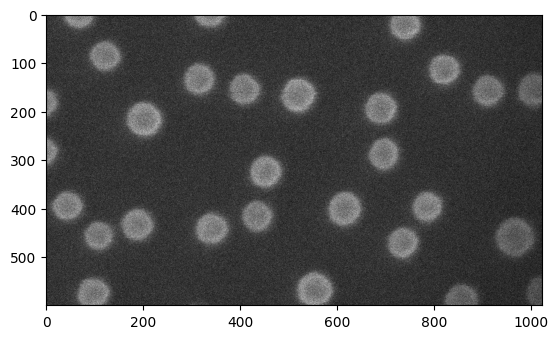

Optimal threshold value: 58.0


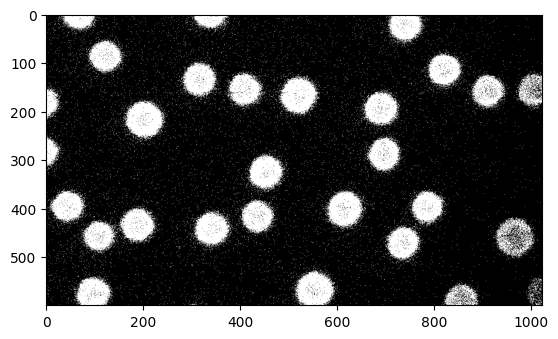

Labelled Image:


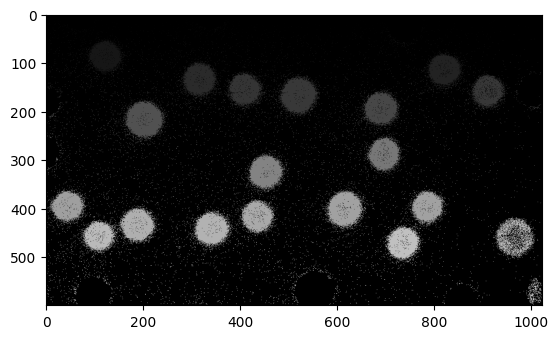

Number of particles: 8780
Marked Particles:


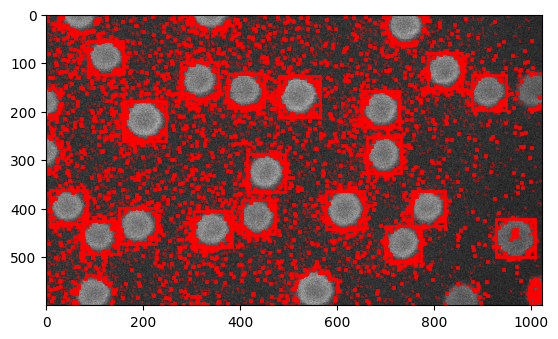

Highlighted Boundary:


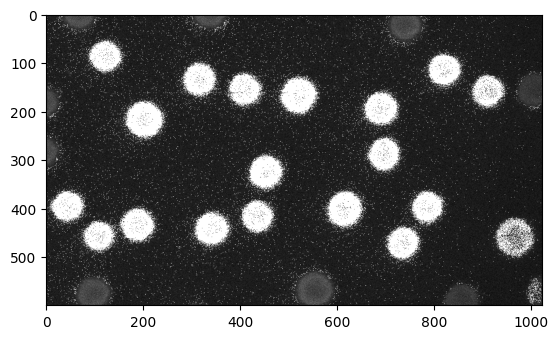

Area of the particles:
Particle 1: 2.0 pixels
Particle 2: 1.0 pixels
Particle 3: 1.0 pixels
Particle 4: 1.0 pixels
Particle 5: 2.0 pixels
Particle 6: 1.0 pixels
Particle 7: 1.0 pixels
Particle 8: 3.0 pixels
Particle 9: 1.0 pixels
Particle 10: 1.0 pixels
Particle 11: 1.0 pixels
Particle 12: 1.0 pixels
Particle 13: 1.0 pixels
Particle 14: 1.0 pixels
Particle 15: 1.0 pixels
Particle 16: 7.0 pixels
Particle 17: 1.0 pixels
Particle 18: 1.0 pixels
Particle 19: 1.0 pixels
Particle 20: 1.0 pixels
Particle 21: 2.0 pixels
Particle 22: 1.0 pixels
Particle 23: 1.0 pixels
Particle 24: 2.0 pixels
Particle 25: 1.0 pixels
Particle 26: 1.0 pixels
Particle 27: 1.0 pixels
Particle 28: 1.0 pixels
Particle 29: 1.0 pixels
Particle 30: 2.0 pixels
Particle 31: 1.0 pixels
Particle 32: 1.0 pixels
Particle 33: 1.0 pixels
Particle 34: 1.0 pixels
Particle 35: 4.0 pixels
Particle 36: 2.0 pixels
Particle 37: 1.0 pixels
Particle 38: 1.0 pixels
Particle 39: 1.0 pixels
Particle 40: 1.0 pixels
Particle 41: 1.0 pixels
Pa

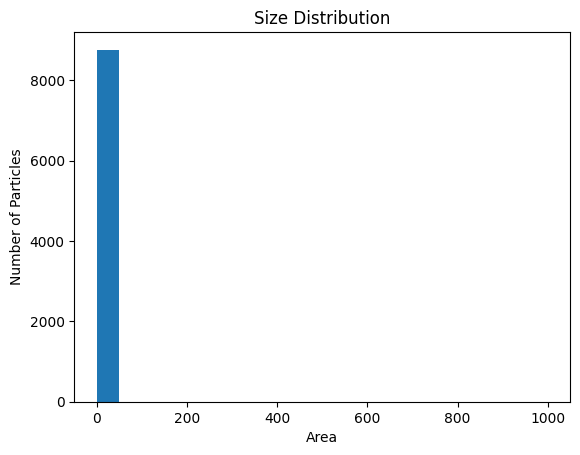

In [95]:
execute('Particles_new/7.jpg')

In [30]:
import skimage as sk
import numpy as np
from skimage import io, filters, measure, color
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import cv2
from numpy import ndim

# Read the image
def read_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img,cmap='gray')
    plt.show()
    img = img[:600,:]
    print('Image shape:', img.shape)
    plt.imshow(img,cmap='gray')
    plt.show()
    return img


#Thresholding
def thresholding(img):
    # k means clustering 
    img = cv2.GaussianBlur(img, (5, 5), 0)
    plt.imshow(img, cmap='gray')
    plt.show()
    Z = img.reshape((-1, 1))
    Z = np.float32(Z)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    plt.imshow(res2, cmap='gray')
    plt.show()

    # # Apply Otsu's thresholding
    # ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # print(f"Optimal threshold value: {ret}")
    # plt.imshow(thresh, cmap='gray')
    # plt.show()
    return res2
    
# region fill
def region_fill(img):
    # Copy the thresholded image.
    im_floodfill = img.copy()

    # Mask used to flood filling.
    # Notice the size needs to be 2 pixels than the image.
    h, w = img.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (0,0), 255)

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    im_out = img | im_floodfill_inv
    print('Region Fill:')
    plt.imshow(im_out, cmap='gray')
    plt.show()
    return im_out


# Remove the border
def remove_border(thresh):
    cleared = clear_border(thresh, )
    return cleared



# Label image regions
def label_image(cleared):
    labelled_image = label(cleared)
    print('Labelled Image:')
    plt.imshow(labelled_image,cmap='gray')
    plt.show()
    return labelled_image


# Find the number of particles 
def find_number_of_particles(label_image):
    regions = regionprops(label_image)
    print('Number of particles:', len(regions))
    return regions

#mark the particles on the original image
def mark_particles(img,regions):
    for region in regions:
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                             fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
    print('Marked Particles:')
    plt.imshow(img,cmap='gray')
    plt.show()

#Highlight the boundary of the particles on the original image
def highlight_boundary(img,regions):
    for region in regions:
        for point in region.coords:
            img[point[0],point[1]] = 255
    print('Highlighted Boundary:')
    plt.imshow(img,cmap='gray')
    plt.show()

# Find the area of the particles
def find_area(regions):
    print('Area of the particles:')
    n = 1
    for region in regions:
        print(f'Particle {n}: {region.area} pixels')
        n += 1

# Find the perimeter of the particles
def find_perimeter(regions):
    print('Perimeter of the particles:')
    n = 1
    for region in regions:
        print(f'Particle {n}: {region.perimeter} pixels')
        n += 1

# Find the eccentricity of the particles
def find_eccentricity(regions):
    print('Eccentricity of the particles:')
    n = 1
    for region in regions:
        print(f'Particle {n}: {region.eccentricity}')
        n += 1

# find the equivalent diameter of the particles
def find_equivalent_diameter(regions):
    print('Equivalent Diameter of the particles:')
    n = 1
    for region in regions:
        print(f'Particle {n}: {region.equivalent_diameter} pixels')
        n += 1
        

# plot size distribution
def plot_size_distribution(regions):
    areas = [region.area for region in regions]
    plt.hist(areas, bins=20, range=[0, 1000])
    plt.title('Size Distribution')
    plt.xlabel('Area')
    plt.ylabel('Number of Particles')
    plt.show()


# # Display the labeled image
# def display_labeled_image(label_image,img):
#     image_label_overlay = color.label2rgb(label_image, image=img, bg_label=0)

#     fig, ax = plt.subplots(figsize=(10, 6))
#     print('Labeled Image:')
#     ax.imshow(image_label_overlay)
#     plt.show()

# Main function
def execute(path):
    img = read_image(path)
    thresh = thresholding(img)
    region_fill1 = region_fill(thresh)
    cleared = remove_border(region_fill1)
    labelled_image = label_image(cleared)
    regions = find_number_of_particles(labelled_image)
    mark_particles(img,regions)
    highlight_boundary(img,regions)
    find_area(regions)
    find_perimeter(regions)
    find_eccentricity(regions)
    find_equivalent_diameter(regions)
    plot_size_distribution(regions)
    # display_labeled_image(label_image,img)



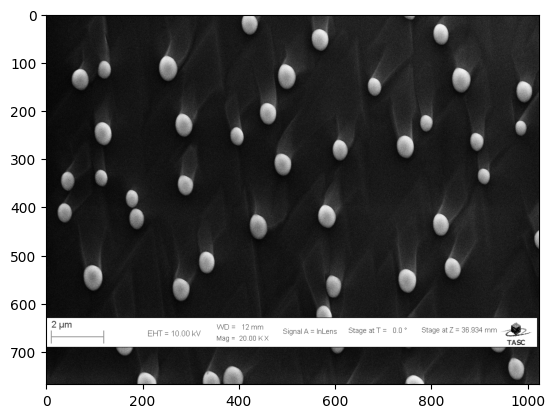

Image shape: (600, 1024)


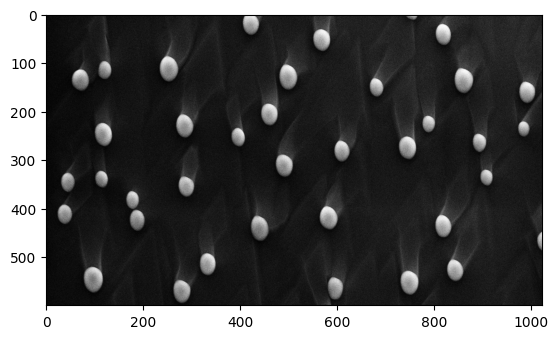

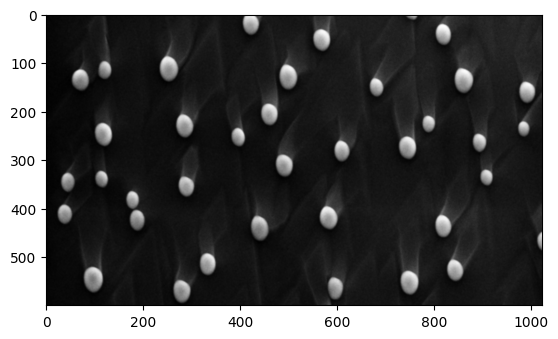

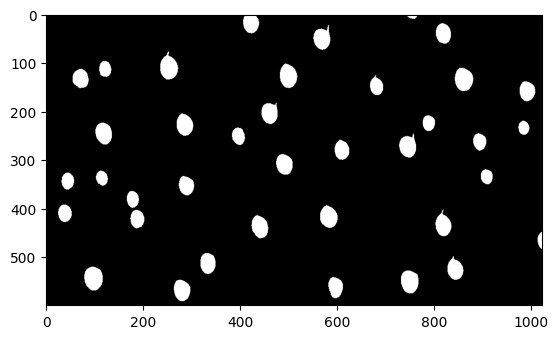

Region Fill:


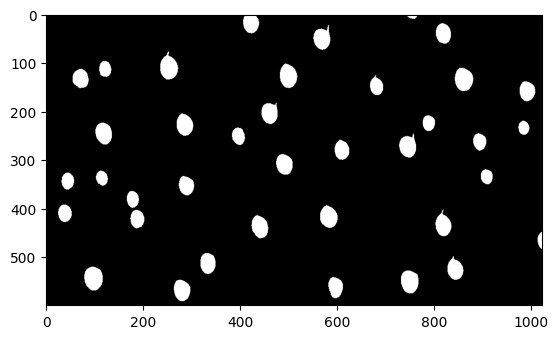

Labelled Image:


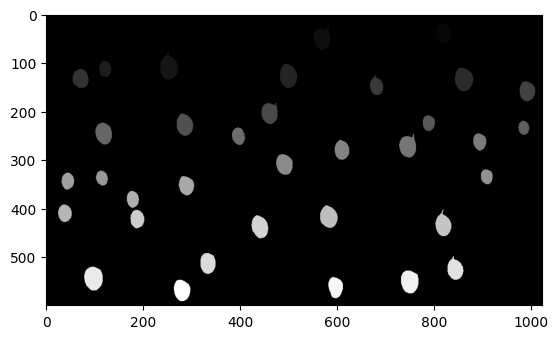

Number of particles: 35
Marked Particles:


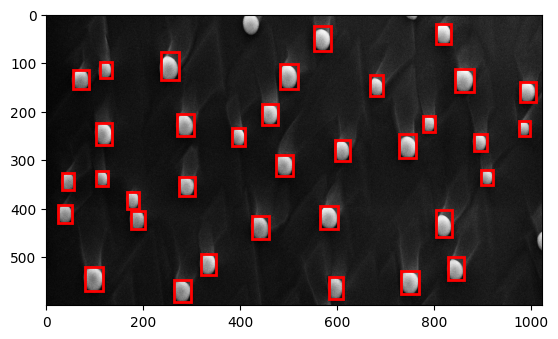

Highlighted Boundary:


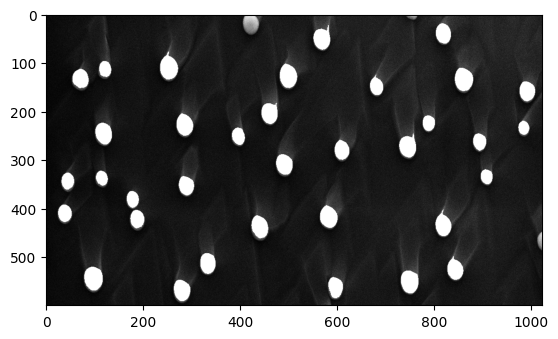

Area of the particles:
Particle 1: 1031.0 pixels
Particle 2: 1228.0 pixels
Particle 3: 1436.0 pixels
Particle 4: 652.0 pixels
Particle 5: 1378.0 pixels
Particle 6: 1423.0 pixels
Particle 7: 1023.0 pixels
Particle 8: 786.0 pixels
Particle 9: 1037.0 pixels
Particle 10: 1170.0 pixels
Particle 11: 1200.0 pixels
Particle 12: 654.0 pixels
Particle 13: 509.0 pixels
Particle 14: 1203.0 pixels
Particle 15: 742.0 pixels
Particle 16: 1258.0 pixels
Particle 17: 745.0 pixels
Particle 18: 956.0 pixels
Particle 19: 1145.0 pixels
Particle 20: 596.0 pixels
Particle 21: 579.0 pixels
Particle 22: 701.0 pixels
Particle 23: 971.0 pixels
Particle 24: 673.0 pixels
Particle 25: 793.0 pixels
Particle 26: 1280.0 pixels
Particle 27: 1163.0 pixels
Particle 28: 848.0 pixels
Particle 29: 1233.0 pixels
Particle 30: 1086.0 pixels
Particle 31: 1102.0 pixels
Particle 32: 1483.0 pixels
Particle 33: 1377.0 pixels
Particle 34: 1004.0 pixels
Particle 35: 1169.0 pixels
Perimeter of the particles:
Particle 1: 119.74011537017

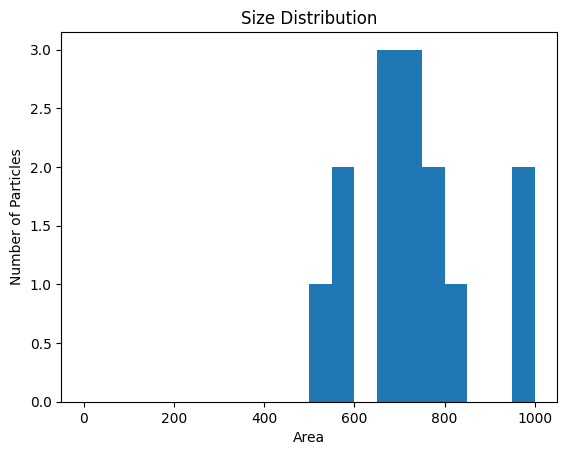

In [31]:
execute('Particles_new/18.jpg')
# execute('Particles/489.jpg')

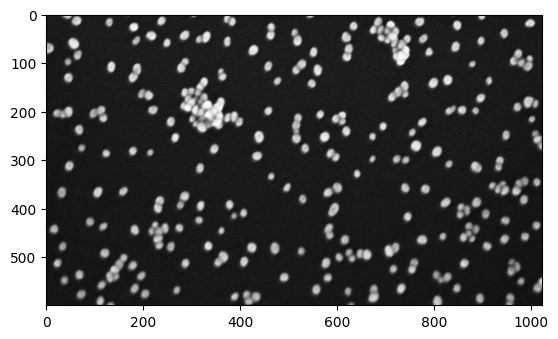

Image shape: (600, 1024)


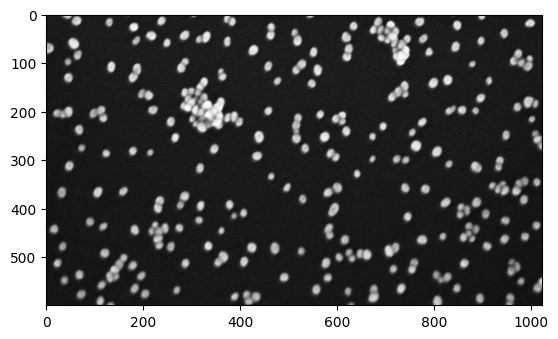

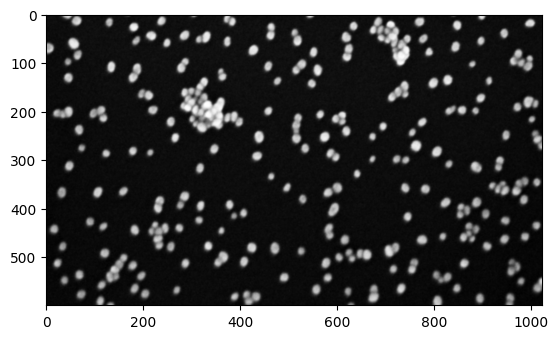

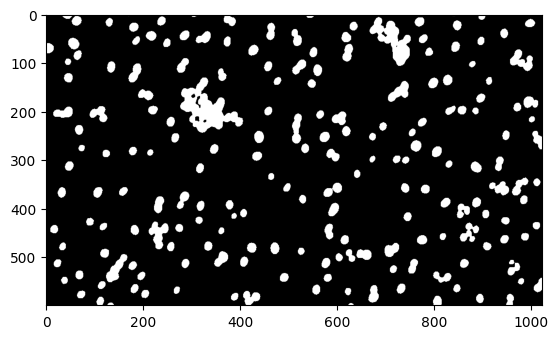

Region Fill:


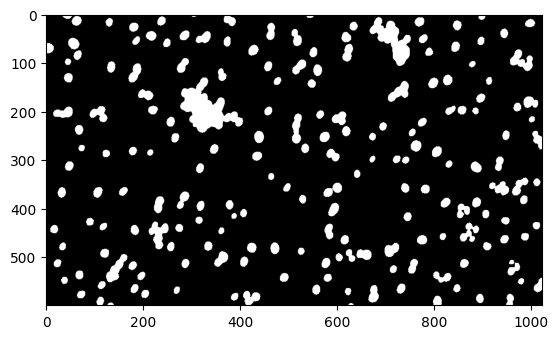

Labelled Image:


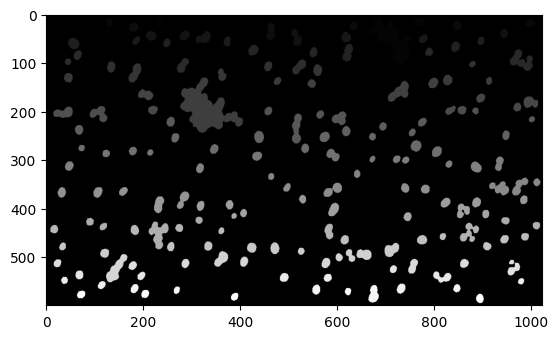

Number of particles: 176
Marked Particles:


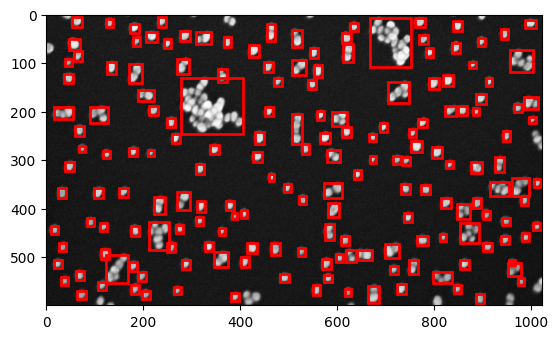

Highlighted Boundary:


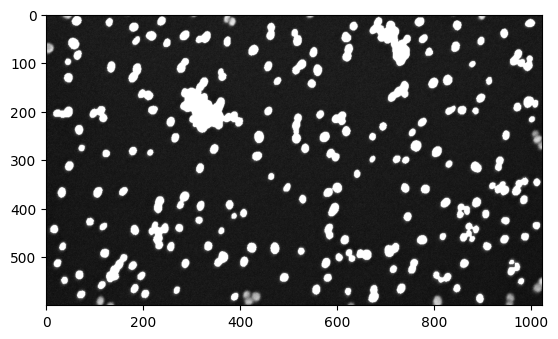

Area of the particles:
Particle 1: 317.0 pixels
Particle 2: 253.0 pixels
Particle 3: 3738.0 pixels
Particle 4: 300.0 pixels
Particle 5: 202.0 pixels
Particle 6: 268.0 pixels
Particle 7: 282.0 pixels
Particle 8: 236.0 pixels
Particle 9: 284.0 pixels
Particle 10: 481.0 pixels
Particle 11: 247.0 pixels
Particle 12: 494.0 pixels
Particle 13: 315.0 pixels
Particle 14: 330.0 pixels
Particle 15: 511.0 pixels
Particle 16: 328.0 pixels
Particle 17: 246.0 pixels
Particle 18: 200.0 pixels
Particle 19: 242.0 pixels
Particle 20: 197.0 pixels
Particle 21: 423.0 pixels
Particle 22: 213.0 pixels
Particle 23: 300.0 pixels
Particle 24: 553.0 pixels
Particle 25: 355.0 pixels
Particle 26: 260.0 pixels
Particle 27: 209.0 pixels
Particle 28: 1129.0 pixels
Particle 29: 251.0 pixels
Particle 30: 464.0 pixels
Particle 31: 135.0 pixels
Particle 32: 514.0 pixels
Particle 33: 311.0 pixels
Particle 34: 266.0 pixels
Particle 35: 134.0 pixels
Particle 36: 631.0 pixels
Particle 37: 342.0 pixels
Particle 38: 327.0 pix

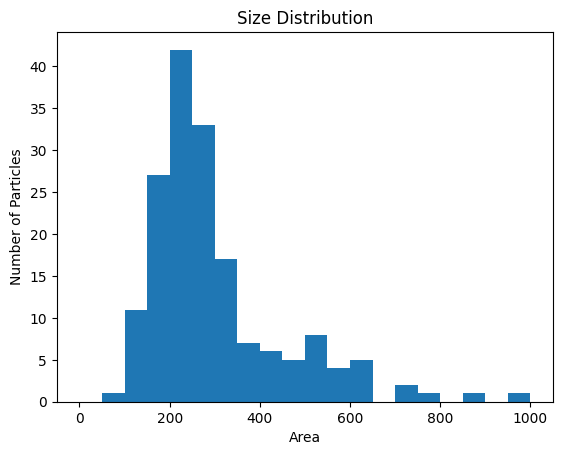

In [20]:
execute('Particles/original/47.jpg')